Fill in the missing code (#####) to use a NN to define a ridge regression. Check for questions at the bottom of the file. For documentation use: https://faroit.com/keras-docs/

Compatibility issues:
compatibility issues may arise depending on the version of keras and tensor flow that is installed
if you install the same keras and tensorflow as listed below, they should disappear:

In [3]:
#Name                    Version                   Build  Channel
#python 3.7.9
#keras                     2.2.4                         0
#tensorflow                1.15.0          eigen_py37h9f89a44_0
#tensorflow-base           1.15.0          eigen_py37h07d2309_0
#tensorflow-estimator      1.15.1             pyh2649769_0

For Error: 'tensorflow.python.framework.ops' has no attribute '_TensorLike'. See:
https://stackoverflow.com/questions/53135439/issue-with-add-method-in-tensorflow-attributeerror-module-tensorflow-python

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler


In [2]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
# from keras.layers import Dense
# from keras.models import Sequential
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from keras.optimizers import SGD
# import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



In [5]:
num_features = 20
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=num_features, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# create scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

# fit scaler on training dataset
scaler.fit(trainX)
# transform training dataset
trainX = scaler.transform(trainX)
# transform test dataset
testX = scaler.transform(testX)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.8147 - val_loss: 0.8925
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8557 - val_loss: 0.7220
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7063 - val_loss: 0.6506
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6393 - val_loss: 0.6083
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5981 - val_loss: 0.5695
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5606 - val_loss: 0.5346
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5265 - val_loss: 0.5027
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4951 - val_loss: 0.4728
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4656 - val_loss: 0.4448
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4381 - val_loss: 0.4187
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4124 - val_loss: 0.3942
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - l

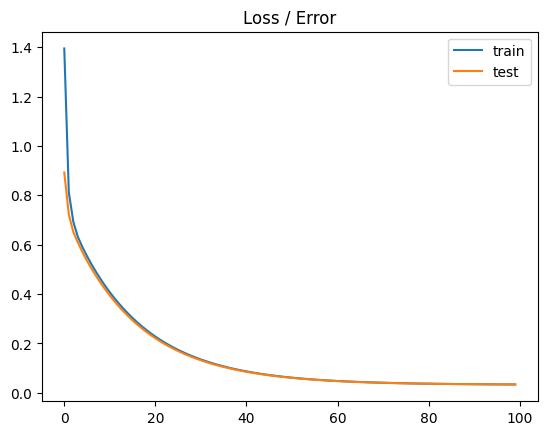

In [8]:
# ridge with scaled inputs outputs on the regression problem
from tensorflow.keras.regularizers import l2


# define model

# model = #####
# model.add(#####
# ##### as many as needed
# #compile the model
# model.compile(#####

model = Sequential()


# add layers to the model
# First hidden layer with 64 units  
# model.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],)))
model.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.01)))


# (Optional) second hidden layer with a smaller size (32 units)
# model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))


# Output layer: regression = 1 unit, linear activation
# model.add(Dense(1, activation='linear'))
model.add(Dense(1, activation='linear', kernel_regularizer=l2(0.01)))



# compile the model
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
    
    
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)
# evaluate the model
train_e = model.evaluate(trainX, trainy, verbose=1)
test_e = model.evaluate(testX, testy, verbose=1)
print('Train loss: %.3f, Test loss: %.3f' % (train_e, test_e)) 
#plot loss during training
plt.title('Loss / Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

How to you change the ridge regression to a lasso regression?

For Documentation see:
https://archive.ph/DcLvJ
https://www.youtube.com/watch?v=xyymDGReKdY&ab_channel=JeffHeaton
The provided example uses the Keras functional model, whereas 
the answer I will provide uses the Keras sequential model, 
so you will get both versions.